<a href="https://colab.research.google.com/github/neon-pink/tensorflow-deep-learning/blob/main/food_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

In [120]:
import os

# Walk through food directory and list number of files
for dirpath, dirnames, filenames in os.walk("drive/MyDrive/Colab Notebooks/food"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'drive/MyDrive/Colab Notebooks/food'.
There are 0 directories and 27 images in 'drive/MyDrive/Colab Notebooks/food/mudde'.
There are 0 directories and 38 images in 'drive/MyDrive/Colab Notebooks/food/rice'.


In [121]:
import pathlib
import numpy as np
data_dir = pathlib.Path("drive/MyDrive/Colab Notebooks/food")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[:] # remove .DS_store
print(class_names)

['mudde' 'rice']


In [122]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['20230928_195532.jpg']
Image shape: (1800, 4000, 3)


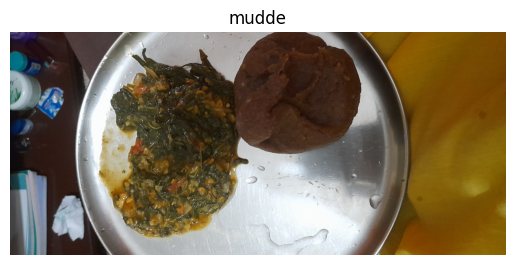

In [123]:
img = view_random_image(target_dir="drive/MyDrive/Colab Notebooks/food/",
                        target_class="mudde")

In [89]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "drive/MyDrive/Colab Notebooks/food"
test_dir = "drive/MyDrive/Colab Notebooks/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 65 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Epoch 1/50
3/3 [==============================] - 13s 2s/step - loss: 0.7225 - accuracy: 0.4923 - val_loss: 0.6767 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 9s 2s/step - loss: 0.6511 - accuracy: 0.5846 - val_loss: 0.6368 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 16s 4s/step - loss: 0.6309 - accuracy: 0.5846 - val_loss: 0.4900 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 14s 2s/step - loss: 0.5738 - accuracy: 0.6615 - val_loss: 0.5086 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 13s 2s/step - loss: 0.6585 - accuracy: 0.5538 - val_loss: 0.4066 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 8s 2s/step - loss: 0.5159 - accuracy: 0.7077 - val_loss: 0.2096 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 10s 2s/step - loss: 0.3650 - accuracy: 0.8462

In [124]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image

In [125]:
def predict_class(value) :
  if value > 0.50 :
    print("predicted : image belongs to class RICE\n ground truth :")
  else :
    print("predicted : image belongs to class MUDDE\n ground truth :")

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 37ms/step
['WhatsApp Image 2023-12-05 at 21.20.57_35264fb5.jpg']
Image shape: (1599, 899, 3)
predicted : image belongs to class MUDDE
 ground truth :


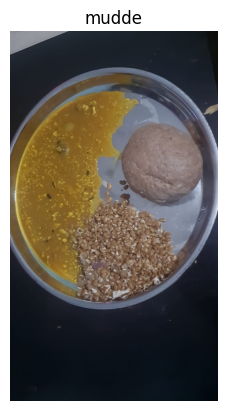

In [126]:
path = '/content/drive/MyDrive/Colab Notebooks/new/mudde/WhatsApp Image 2023-12-05 at 21.20.57_35264fb5.jpg'
image = read_image(path)
train_labels = train_data.classes
test_labels = valid_data.classes
prediction = model_1.predict(image)
which_class = prediction.argmax(axis=-1)
prediction
img = view_random_image(target_dir="/content/drive/MyDrive/Colab Notebooks/new/",
                        target_class="mudde")
predict_class(prediction)

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 56ms/step
['WhatsApp Image 2023-12-06 at 20.34.10_297313e6.jpg']
Image shape: (1280, 576, 3)
predicted : image belongs to class RICE
 ground truth :


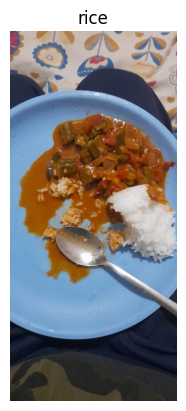

In [127]:
path = '/content/drive/MyDrive/Colab Notebooks/test/rice/20231027_144341.jpg'
image = read_image(path)
train_labels = train_data.classes
test_labels = valid_data.classes
prediction = model_1.predict(image)
which_class = prediction.argmax(axis=-1)
prediction
img = view_random_image(target_dir="drive/MyDrive/Colab Notebooks/new/",
                        target_class="rice")
predict_class(prediction)